# MNIST Digit Recognizer
**Description:** This program identifies digits from a dataset of handwritten images.
It uses Convolutional Neural Networks (CNN).

In [1]:
# Importing the libraries
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

np.random.seed(1)
tf.random.set_seed(2)

In [2]:
# Load the train and test data.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Get the format of the data
display(train_df.head())
display(train_df.info())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

Notice that each row corresponds to a different example. The first column corresponds to the label (digit) and the rest of the columns are the flattened pixels of the image.

In [4]:
# Get the shape of each square image
length = int(np.sqrt(train_df.shape[1]-1))
print('The shape of each image is (' + str(length) + ',' + str(length) + ')')

The shape of each image is (28,28)


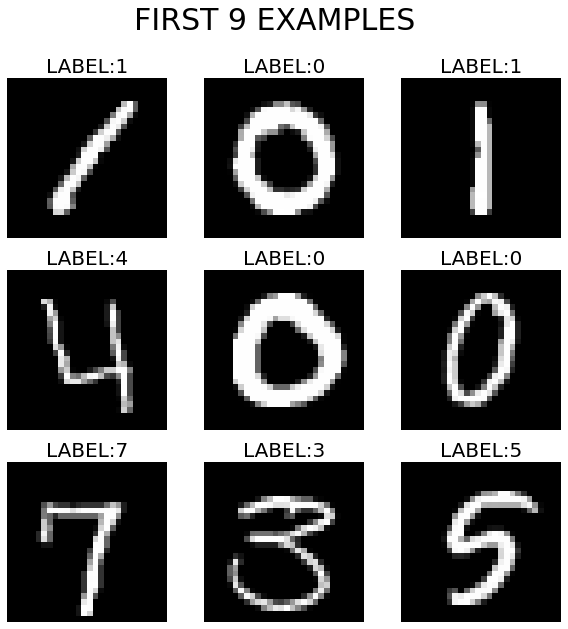

In [5]:
#Display first examples to have a first view of the data to be processed.
columns = 3
rows = 3
#-----------------------------------------------------------------------
fig, axes = plt.subplots(nrows=columns, ncols=rows, figsize=(10,10))
fig.suptitle('FIRST '+str(columns*rows) +' EXAMPLES', fontsize = 30)
for i,j in zip(range(columns*rows),axes.ravel()):
    img = (train_df.iloc[i].to_numpy()[1:]).reshape(28,28)
    j.imshow(img, cmap='gray')
    j.axis('off')
    j.set_title("LABEL:"+str(train_df.iloc[i].to_numpy()[0]), fontsize = 20) 
plt.show()


C:\Users\57322\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

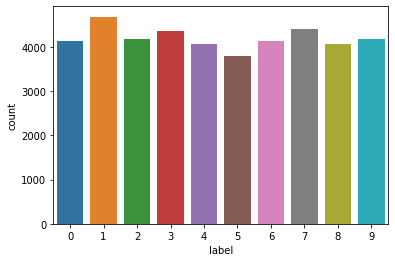

In [6]:
# Inspect the balance in the counting of the labels.
sns.countplot(train_df['label'])

The dataset is balanced. We have a similar number of examples for each class.

In [7]:
# Get the label and the features (pixels) from the training dataset.
X = train_df.drop(['label'], axis = 1)
y = train_df['label']

display(X.head())
display(y.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
# Get data types of X and y
print('\033[1m' + 'DATA TYPES OF X' + '\033[0m')
print(X.dtypes)
print('\033[1m' + 'DATA TYPES OF Y' + '\033[0m')
print(y.dtypes)


DATA TYPES OF X
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object
DATA TYPES OF Y
int64


Notice that the data types of the dataframes is int, and it has to be float.

In [9]:
# Split the data into training and validation sets.
validation_fraction = 0.2
#-----------------------------------------------------------------------
total_size = X.shape[0]
validation_size = int(np.ceil(total_size*validation_fraction))
train_size = total_size - validation_size
print('\033[1m' + 'WE HAVE A TOTAL OF ' +str(total_size)+ ' EXAMPLES' + '\033[0m')

print('\033[1m' + str((1-validation_fraction)*100)+ '% OF OUR EXAMPLES WILL BE FOR TRAINING AND ' + str(validation_fraction*100) +'% FOR VALIDATION' + '\033[0m')
print('\033[1m' + 'WE HAVE A TOTAL OF ' +str(train_size)+ ' TRAINING EXAMPLES' + '\033[0m')
print('\033[1m' + 'WE HAVE A TOTAL OF ' +str(validation_size)+ ' VALIDATION EXAMPLES' + '\033[0m')

# Split the data into two sets

X_train_original = X.loc[:train_size-1].astype('float32')
y_train_categorical = y.loc[:train_size-1].to_numpy()


X_val_original = X.loc[train_size:].astype('float32')
y_val_categorical = y.loc[train_size:].to_numpy()


WE HAVE A TOTAL OF 42000 EXAMPLES
80.0% OF OUR EXAMPLES WILL BE FOR TRAINING AND 20.0% FOR VALIDATION
WE HAVE A TOTAL OF 33600 TRAINING EXAMPLES
WE HAVE A TOTAL OF 8400 VALIDATION EXAMPLES


In [10]:
# Binning the pixels of the images.
def preprocess_data(X):
    X_out = X/255
    for i in range(X_out.shape[0]):
        for j in range(X_out.shape[1]):
            for k in range(X_out.shape[2]):
                if X_out[i,j,k] > 0.5:
                    X_out[i,j,k] = 1
                if X_out[i,j,k] > 0 and X_out[i,j,k] < 0.5:
                    X_out[i,j,k] = 0.5
    return X_out

In [11]:
X_train = [] #This list will contain the reshaped data
X_val = [] #This list will contain the reshaped data

# One hot encode the labels.
y_train = np.zeros((y_train_categorical.size, 10))
y_train[np.arange(train_size),y_train_categorical] = 1

y_val = np.zeros((validation_size, 10))
y_val[np.arange(validation_size),y_val_categorical] = 1

# Get each example and reshape it, then save it in the list 
for i in range(train_size):
    X_train.append(X_train_original.iloc[i].to_numpy().reshape(28,28,1))
    
for i in range(validation_size):
    X_val.append(X_val_original.iloc[i].to_numpy().reshape(28,28, 1))

# Convert the list to numpy array
X_train = np.array(X_train)  
X_val = np.array(X_val)

X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val)

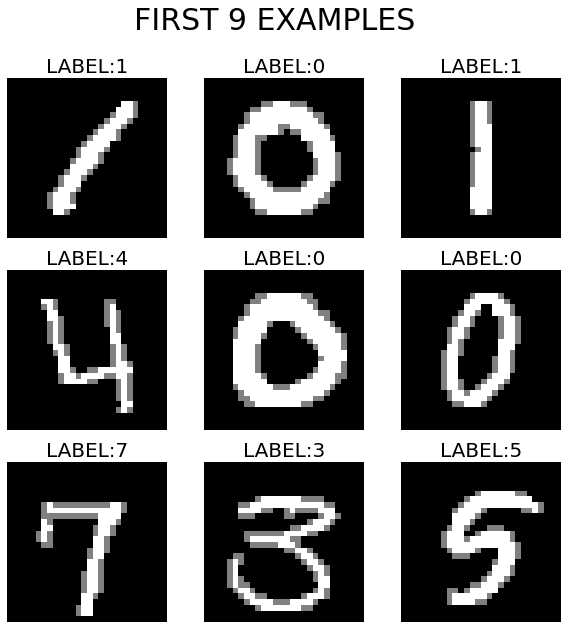

In [12]:
#Display first examples to have a first view of the processed data.
columns = 3
rows = 3
#-----------------------------------------------------------------------
fig, axes = plt.subplots(nrows=columns, ncols=rows, figsize=(10,10))
fig.suptitle('FIRST '+str(columns*rows) +' EXAMPLES', fontsize = 30)
for i,j in zip(range(columns*rows),axes.ravel()):
    img = X_train[i]
    j.imshow(img, cmap='gray')
    j.axis('off')
    j.set_title("LABEL:"+str(train_df.iloc[i].to_numpy()[0]), fontsize = 20) 
plt.show()


## REDUCING BIAS
Considering that digit recognition is a fairly simple task for humans and that we are dealing with unstructured data, we can say with certainty that the Human Level Performance (HLP) is near to Bayesian Optimal Error (the lowest possible error rate). 

The first step was to overfit the training set. It was a very empirical and iterative process. In order to fix high bias we can increase the complexity of the model or train for longer times.  

The process was to add convolutional layers to the network until it had a safisfactory performance. The first two convolutional layers have 32 filters. The third and fourth layers, 64 filters. The last one, 128 filters.

After the second, fourth and fifth convolutional layer the model has a MaxPooling layer.

The first dense layer has 256 neurons, the second one, 128 and the last one, 64 neurons.

Adam optimizer showed a better performance than sgd.

## REDUCING VARIANCE

Then, when the model has a good performance on the training data, it is necessary to improve the performance on the validation set. The model overfits the training set, so we have to fix the high variance.
 
In order to fix the overfitting we can increase the training data (add new synthetic examples) term or add dropout layers to the model. 

The strategy was to gradually add dropout layers. Considered to add regularization to the dense layers.

Implemented data augmentantion to improve the accuracy on the validation set (this creates synthetic images by appliyng transformations to the originals).


## CREATING THE MODEL

In [13]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Implement data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center=False,
    zoom_range=0.1,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

datagen.fit(X_train)

In [15]:
# Fit the model and save the history
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001) # Add learning rate decay to favor convergence.

# Train over 100 epochs to reduce bias
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs = 100, callbacks=[reduce_lr] ) # Reduce epochs from 100 to 50

C:\Users\57322\AppData\Local\Temp\ipykernel_14328\1326307447.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs = 100, callbacks=[reduce_lr] ) # Reduce epochs from 100 to 50


Epoch 1/100
1050/1050 [==============================] - 85s 80ms/step - loss: 0.3702 - accuracy: 0.8834 - val_loss: 0.0890 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 83s 79ms/step - loss: 0.1494 - accuracy: 0.9573 - val_loss: 0.1972 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 89s 85ms/step - loss: 0.1241 - accuracy: 0.9640 - val_loss: 0.0519 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 85s 81ms/step - loss: 0.1095 - accuracy: 0.9692 - val_loss: 0.0697 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 88s 84ms/step - loss: 0.0938 - accuracy: 0.9734 - val_loss: 0.0534 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 91s 87ms/step - loss: 0.0917 - accuracy: 0.9735 - val_loss: 0.0437 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 7/100
1050/1050 [=================

Epoch 51/100
1050/1050 [==============================] - 137s 131ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0208 - val_accuracy: 0.9956 - lr: 1.0000e-05
Epoch 52/100
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0206 - val_accuracy: 0.9955 - lr: 1.0000e-05
Epoch 53/100
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.0206 - val_accuracy: 0.9954 - lr: 1.0000e-05
Epoch 54/100
1050/1050 [==============================] - 105s 100ms/step - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0206 - val_accuracy: 0.9957 - lr: 1.0000e-05
Epoch 55/100
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0207 - val_accuracy: 0.9956 - lr: 1.0000e-05
Epoch 56/100
1050/1050 [==============================] - 125s 119ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0206 - val_accuracy: 0.9955 - lr: 1.0000e-0

1050/1050 [==============================] - 99s 94ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0200 - val_accuracy: 0.9955 - lr: 1.0000e-05


In [16]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        1

Tracked accuracy and loss over time.

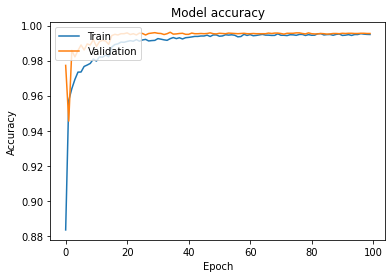

In [17]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

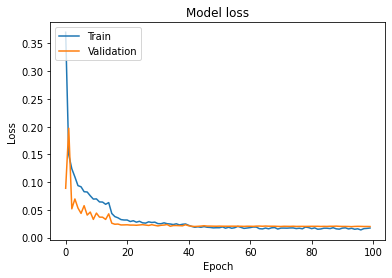

In [18]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Look at the graphs. In the validation set, a better performance is obtained than in the training set, which at first glance can be strange. However, since dropout was included in the solution,the neural network does not have 100% of its computational power available during training, but in the validation stage it does.

In [19]:
# Evaluate the accuracy in the train set.
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred,axis=1)
y_train = np.argmax(y_train,axis=1)

misclassified = []
for i in range(len(y_pred)):
    if y_pred[i] != y_train[i]:
        misclassified.append(i)
        
print('In total we have ' + str(len(misclassified)) + ' misclassified examples in the training set.')
print('The training accuracy is: ' + str((len(y_pred)-len(misclassified))/len(y_pred)))

In total we have 42 misclassified examples in the training set.
The training accuracy is: 0.99875


In [20]:
# Evaluate the accuracy in the validation set.
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred,axis=1)
y_val = np.argmax(y_val,axis=1)

misclassified = []
for i in range(len(y_pred)):
    if y_pred[i] != y_val[i]:
        misclassified.append(i)
        
print('In total we have ' + str(len(misclassified)) + ' misclassified examples in the validation set.')
print('The validation accuracy is: ' + str((len(y_pred)-len(misclassified))/len(y_pred)))

In total we have 38 misclassified examples in the validation set.
The validation accuracy is: 0.9954761904761905


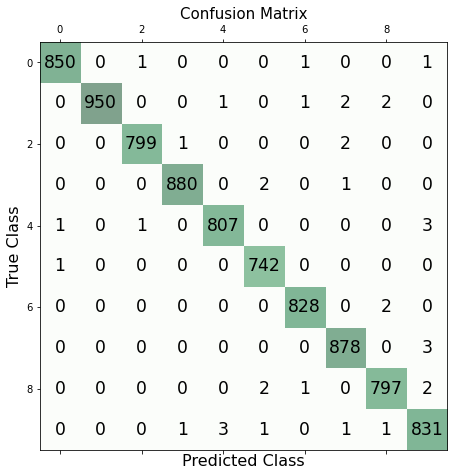

In [21]:
# Confusion Matrix
conf_mat = confusion_matrix(y_val, y_pred)

fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(conf_mat, cmap=plt.cm.Greens, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m,y=n,s=conf_mat[m, n], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Class', fontsize=16)
plt.ylabel('True Class', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

The training accuracy is very high, which suggests us that it is very close to the theoretical limit (low bias). The validation accuracy is very close to the training accuracy so, we are not overfitting the training set (low variance). This means that if the test set comes from the same distribution as the validation set, the model should have a low test error and should generalize satisfactorily.

## ERROR ANALYSIS

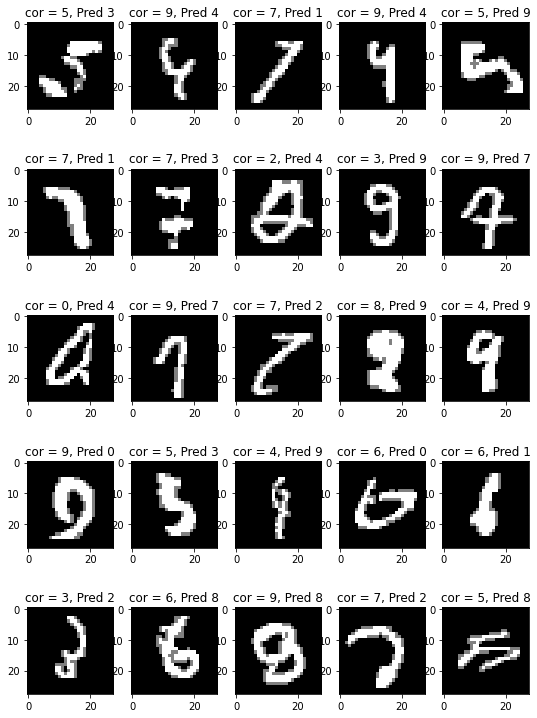

In [22]:
## Missclassified examples
w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 5
rows = 5
ax = []

for i in range(25):
    img = (X_val[misclassified[i]])
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('cor = ' + str(y_val[misclassified[i]]) + str(', Pred ') + str(y_pred[misclassified[i]]))  # set title
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    

C:\Users\57322\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

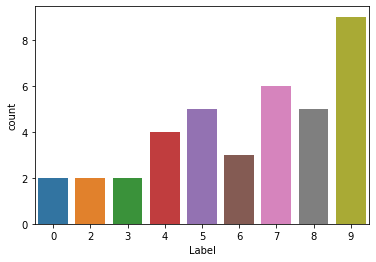

In [23]:
MisClassPreds = []
CorrectPreds = []
for i in misclassified:
    CorrectPreds.append(y_val[i])
    MisClassPreds.append(y_pred[i])

df = pd.DataFrame(list(zip(CorrectPreds, MisClassPreds)),
               columns =['Label', 'Prediction'])

sns.countplot(df['Label'])

Notice that an important fraction of the misclassified examples are 9s and 7s. There is a clear correlation between these digits and the error. There is a lot of room for improvement if we focus on identifying nines and fours. We can do this by collecting more data from these digits.

In [24]:
model.save('mnist_recognizer.h5')